Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



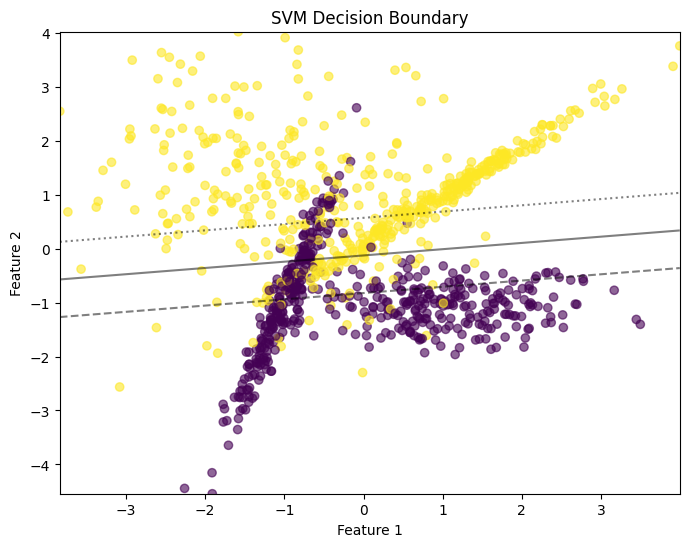

In [21]:
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,classification_report 
import matplotlib.pyplot as plt 
import numpy as np

X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
model = SVC(kernel='linear') 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
report = classification_report(y_test, y_pred) 
print(f"Accuracy: {accuracy}") 
print(f"Classification Report:\n{report}") 
# Plotting the decision boundary (works only for 2D data)
if X.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y,alpha=0.6)
    x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    xx, yy = np.meshgrid(x_values, y_values)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    decision_values = model.decision_function(grid_points)
    Z = decision_values.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', ':'], alpha=0.5)
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
